In [155]:
from scapy.all import rdpcap, TCP, IP
from decimal import Decimal, getcontext
import numpy as np
import pandas as pd
import os

## Data Cleaning

In [369]:
df = pd.read_csv('test2.csv')

In [370]:
df

,File,TotalBytes,AvgBytesPerChunk,MaxBytesPerChunk,MinBytesPerChunk,StdBytesPerChunk,AvgTransferTime,StdTransferTime,AvgTimeBetweenChunks,StdTimeBetweenChunks,...,85PercChunkSizeforfirst10,90PercChunkSizeforfirst10,AvgChunksizeforfirst100,MaxChunksizeforfirst100,MinChunksizeforfirst100,StdChunksizeforfirst100,50PercChunkSizeforfirst100,75PercChunkSizeforfirst100,85PercChunkSizeforfirst100,90PercChunkSizeforfirst100
0,"['Mar22', '48']",401356975424,1.475577e+09,4.265916e+09,1,1169882086,2.213270,5.630726,2.213270,5.630726,...,1.636411e+09,1.666984e+09,1.406916e+09,4.237014e+09,38.0,1.080331e+09,1.667001e+09,1.667079e+09,1.816241e+09,3.238554e+09
1,"['Mar20', '132']",360393669119,1.301060e+09,4.283163e+09,1,984779674,2.133094,5.883209,2.133094,5.883209,...,2.161032e+09,2.553194e+09,1.134539e+09,4.283163e+09,38.0,8.867891e+08,7.137031e+08,1.034466e+09,2.547997e+09,2.795702e+09
2,"['Mar05', '52']",495187865668,1.487051e+09,4.049696e+09,1,1039541150,1.803026,6.159701,1.803026,6.159701,...,2.631780e+09,2.973164e+09,1.596555e+09,4.049696e+09,38.0,1.026121e+09,1.391655e+09,2.159541e+09,2.754983e+09,2.900314e+09
3,"['Mar19', '229']",568795608721,1.864904e+09,4.160026e+09,1,1210746242,1.933297,5.523831,1.933297,5.523831,...,2.312996e+09,3.183402e+09,2.833216e+09,3.953247e+09,38.0,8.720251e+08,3.196767e+09,3.196815e+09,3.196836e+09,3.196842e+09
4,"['Mar21', '43']",341786621075,1.345617e+09,3.996608e+09,1,818996076,2.344433,5.945635,2.344433,5.945635,...,2.883159e+09,2.883159e+09,1.838882e+09,2.883159e+09,96064180.0,4.737922e+08,1.857408e+09,1.857431e+09,1.857468e+09,1.890823e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"['Mar01', '93']",247157316823,9.053382e+08,3.703988e+09,1,1077940519,2.163401,7.989653,2.163401,7.989653,...,2.825952e+09,3.004136e+09,7.395856e+08,3.703988e+09,38.0,1.050587e+09,5.050746e+07,1.347409e+09,1.900139e+09,2.245373e+09
344,"['Mar02', '103']",545280808258,1.469760e+09,4.270930e+09,1,1155438183,1.593241,6.337802,1.593241,6.337802,...,1.993017e+09,2.125138e+09,1.222031e+09,4.145902e+09,46.0,1.118098e+09,1.370630e+09,1.956466e+09,2.148372e+09,2.646000e+09
345,"['Mar19', '258']",309010249416,1.179428e+09,3.843513e+09,1,1070024374,2.298960,6.546434,2.298960,6.546434,...,2.369704e+09,2.732326e+09,6.265073e+08,3.748787e+09,69.0,8.226498e+08,2.498970e+08,4.072427e+08,1.666291e+09,1.906320e+09
346,"['Mar20', '143']",407905895753,1.522037e+09,4.058972e+09,1,903072723,2.203305,6.307195,2.203305,6.307195,...,8.421720e+08,1.117927e+09,1.733502e+09,4.058972e+09,32657758.0,6.960019e+08,1.895700e+09,1.895745e+09,1.895766e+09,2.368714e+09


In [371]:
valid_resolutions = [144, 240, 360, 480, 720, 1080]
# unwanted_data = ["video_id", "home_id"]
# unwanted_data = [
#   "video_id",
#   "video_position",
#   "index",
#   'home_id',
#   "relative_timestamp",
#   "absolute_timestamp",
#   'resolution', 
#   'session_id'
# ]
# df = df.drop(columns=unwanted_data)
df.columns

Index(['File', 'TotalBytes', 'AvgBytesPerChunk', 'MaxBytesPerChunk',
       'MinBytesPerChunk', 'StdBytesPerChunk', 'AvgTransferTime',
       'StdTransferTime', 'AvgTimeBetweenChunks', 'StdTimeBetweenChunks',
       'RetransmittedChunks', 'Bitrate', '50PercChunkSizeforAll',
       '75PercChunkSizeforAll', '85PercChunkSizeforAll',
       '90PercChunkSizeforAll', 'AvgChunksizeforlast10',
       'MaxChunksizeforlast10', 'MinChunksizeforlast10',
       'StdChunksizeforlast10', '50PercChunkSizeforlast10',
       '75PercChunkSizeforlast10', '85PercChunkSizeforlast10',
       '90PercChunkSizeforlast10', 'AvgChunksizeforlast100',
       'MaxChunksizeforlast100', 'MinChunksizeforlast100',
       'StdChunksizeforlast100', '50PercChunkSizeforlast100',
       '75PercChunkSizeforlast100', '85PercChunkSizeforlast100',
       '90PercChunkSizeforlast100', 'AvgChunksizeforfirst10',
       'MaxChunksizeforfirst10', 'MinChunksizeforfirst10',
       'StdChunksizeforfirst10', '50PercChunkSizeforfirst10',
 

In [372]:
string_columns = [col for col in df.columns if df[col].dtype == 'object']
string_columns

['File']

In [373]:
# df['service'].head(), df['session_id'].head()
df['session_id'] = list(np.arange(len(df)))

In [374]:
# df_filtered = df.drop(columns=string_columns, errors='ignore')

In [375]:
import ast
df['File'] = df['File'].apply(ast.literal_eval)
df

,File,TotalBytes,AvgBytesPerChunk,MaxBytesPerChunk,MinBytesPerChunk,StdBytesPerChunk,AvgTransferTime,StdTransferTime,AvgTimeBetweenChunks,StdTimeBetweenChunks,...,90PercChunkSizeforfirst10,AvgChunksizeforfirst100,MaxChunksizeforfirst100,MinChunksizeforfirst100,StdChunksizeforfirst100,50PercChunkSizeforfirst100,75PercChunkSizeforfirst100,85PercChunkSizeforfirst100,90PercChunkSizeforfirst100,session_id
0,"[Mar22, 48]",401356975424,1.475577e+09,4.265916e+09,1,1169882086,2.213270,5.630726,2.213270,5.630726,...,1.666984e+09,1.406916e+09,4.237014e+09,38.0,1.080331e+09,1.667001e+09,1.667079e+09,1.816241e+09,3.238554e+09,0
1,"[Mar20, 132]",360393669119,1.301060e+09,4.283163e+09,1,984779674,2.133094,5.883209,2.133094,5.883209,...,2.553194e+09,1.134539e+09,4.283163e+09,38.0,8.867891e+08,7.137031e+08,1.034466e+09,2.547997e+09,2.795702e+09,1
2,"[Mar05, 52]",495187865668,1.487051e+09,4.049696e+09,1,1039541150,1.803026,6.159701,1.803026,6.159701,...,2.973164e+09,1.596555e+09,4.049696e+09,38.0,1.026121e+09,1.391655e+09,2.159541e+09,2.754983e+09,2.900314e+09,2
3,"[Mar19, 229]",568795608721,1.864904e+09,4.160026e+09,1,1210746242,1.933297,5.523831,1.933297,5.523831,...,3.183402e+09,2.833216e+09,3.953247e+09,38.0,8.720251e+08,3.196767e+09,3.196815e+09,3.196836e+09,3.196842e+09,3
4,"[Mar21, 43]",341786621075,1.345617e+09,3.996608e+09,1,818996076,2.344433,5.945635,2.344433,5.945635,...,2.883159e+09,1.838882e+09,2.883159e+09,96064180.0,4.737922e+08,1.857408e+09,1.857431e+09,1.857468e+09,1.890823e+09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"[Mar01, 93]",247157316823,9.053382e+08,3.703988e+09,1,1077940519,2.163401,7.989653,2.163401,7.989653,...,3.004136e+09,7.395856e+08,3.703988e+09,38.0,1.050587e+09,5.050746e+07,1.347409e+09,1.900139e+09,2.245373e+09,343
344,"[Mar02, 103]",545280808258,1.469760e+09,4.270930e+09,1,1155438183,1.593241,6.337802,1.593241,6.337802,...,2.125138e+09,1.222031e+09,4.145902e+09,46.0,1.118098e+09,1.370630e+09,1.956466e+09,2.148372e+09,2.646000e+09,344
345,"[Mar19, 258]",309010249416,1.179428e+09,3.843513e+09,1,1070024374,2.298960,6.546434,2.298960,6.546434,...,2.732326e+09,6.265073e+08,3.748787e+09,69.0,8.226498e+08,2.498970e+08,4.072427e+08,1.666291e+09,1.906320e+09,345
346,"[Mar20, 143]",407905895753,1.522037e+09,4.058972e+09,1,903072723,2.203305,6.307195,2.203305,6.307195,...,1.117927e+09,1.733502e+09,4.058972e+09,32657758.0,6.960019e+08,1.895700e+09,1.895745e+09,1.895766e+09,2.368714e+09,346


# Add resolution

In [376]:
df_res = pd.read_csv('ExperimentInfo.txt', delimiter=' ', names=['exp', 'id', 'res', 'length'], header=None)
df_res['res'] = df_res['res'].apply(lambda x: (x[2:] if ('hd' in x) else x))
df_res['res'] = df_res['res'].apply(lambda x: '480' if x=='large' else ('360' if x=='medium' else ('240' if x=='small' else('144' if x=='tiny' else x))))

In [377]:
res_dict = {}
for i, j in zip(df_res['exp'], df_res['res']): 
    res_dict[i] = j

In [378]:
res_dict

{28: '720',
 29: '720',
 30: '720',
 31: '720',
 32: '720',
 33: '720',
 34: '720',
 35: '720',
 36: '720',
 37: '720',
 38: '720',
 39: '720',
 40: '720',
 41: '720',
 42: '720',
 43: '720',
 44: '720',
 45: '720',
 46: '720',
 47: '720',
 48: '720',
 49: '720',
 50: '720',
 51: '720',
 52: '720',
 53: '720',
 54: '720',
 55: '720',
 56: '720',
 57: '720',
 58: '720',
 59: '720',
 60: '720',
 61: '720',
 62: '720',
 63: '720',
 64: '720',
 65: '720',
 66: '720',
 67: '720',
 68: '1080',
 69: '1080',
 70: '1080',
 71: '1080',
 72: '1080',
 73: '1080',
 74: '1080',
 75: '1080',
 76: '1080',
 77: '1080',
 78: '1080',
 79: '1080',
 80: '1080',
 81: '1080',
 82: '1080',
 83: '1080',
 84: '1080',
 85: '1080',
 86: '1080',
 87: '1080',
 88: '1080',
 89: '1080',
 90: '1080',
 91: '1080',
 92: '1080',
 93: '1080',
 94: '1080',
 95: '1080',
 96: '1080',
 97: '1080',
 98: '1080',
 99: '1080',
 100: '1080',
 101: '1080',
 102: '1080',
 103: '1080',
 104: '1080',
 105: '1080',
 106: '1080',
 107: 

In [379]:
df['resolution'] = [int(res_dict[int(x[1])]) for x in df['File']]

In [380]:
df

,File,TotalBytes,AvgBytesPerChunk,MaxBytesPerChunk,MinBytesPerChunk,StdBytesPerChunk,AvgTransferTime,StdTransferTime,AvgTimeBetweenChunks,StdTimeBetweenChunks,...,AvgChunksizeforfirst100,MaxChunksizeforfirst100,MinChunksizeforfirst100,StdChunksizeforfirst100,50PercChunkSizeforfirst100,75PercChunkSizeforfirst100,85PercChunkSizeforfirst100,90PercChunkSizeforfirst100,session_id,resolution
0,"[Mar22, 48]",401356975424,1.475577e+09,4.265916e+09,1,1169882086,2.213270,5.630726,2.213270,5.630726,...,1.406916e+09,4.237014e+09,38.0,1.080331e+09,1.667001e+09,1.667079e+09,1.816241e+09,3.238554e+09,0,720
1,"[Mar20, 132]",360393669119,1.301060e+09,4.283163e+09,1,984779674,2.133094,5.883209,2.133094,5.883209,...,1.134539e+09,4.283163e+09,38.0,8.867891e+08,7.137031e+08,1.034466e+09,2.547997e+09,2.795702e+09,1,480
2,"[Mar05, 52]",495187865668,1.487051e+09,4.049696e+09,1,1039541150,1.803026,6.159701,1.803026,6.159701,...,1.596555e+09,4.049696e+09,38.0,1.026121e+09,1.391655e+09,2.159541e+09,2.754983e+09,2.900314e+09,2,720
3,"[Mar19, 229]",568795608721,1.864904e+09,4.160026e+09,1,1210746242,1.933297,5.523831,1.933297,5.523831,...,2.833216e+09,3.953247e+09,38.0,8.720251e+08,3.196767e+09,3.196815e+09,3.196836e+09,3.196842e+09,3,144
4,"[Mar21, 43]",341786621075,1.345617e+09,3.996608e+09,1,818996076,2.344433,5.945635,2.344433,5.945635,...,1.838882e+09,2.883159e+09,96064180.0,4.737922e+08,1.857408e+09,1.857431e+09,1.857468e+09,1.890823e+09,4,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"[Mar01, 93]",247157316823,9.053382e+08,3.703988e+09,1,1077940519,2.163401,7.989653,2.163401,7.989653,...,7.395856e+08,3.703988e+09,38.0,1.050587e+09,5.050746e+07,1.347409e+09,1.900139e+09,2.245373e+09,343,1080
344,"[Mar02, 103]",545280808258,1.469760e+09,4.270930e+09,1,1155438183,1.593241,6.337802,1.593241,6.337802,...,1.222031e+09,4.145902e+09,46.0,1.118098e+09,1.370630e+09,1.956466e+09,2.148372e+09,2.646000e+09,344,1080
345,"[Mar19, 258]",309010249416,1.179428e+09,3.843513e+09,1,1070024374,2.298960,6.546434,2.298960,6.546434,...,6.265073e+08,3.748787e+09,69.0,8.226498e+08,2.498970e+08,4.072427e+08,1.666291e+09,1.906320e+09,345,144
346,"[Mar20, 143]",407905895753,1.522037e+09,4.058972e+09,1,903072723,2.203305,6.307195,2.203305,6.307195,...,1.733502e+09,4.058972e+09,32657758.0,6.960019e+08,1.895700e+09,1.895745e+09,1.895766e+09,2.368714e+09,346,480


## Quality Inference via RF

In [407]:
import numpy as np

train_sessions = np.random.choice(df['session_id'].unique(), int(df['session_id'].unique().shape[0]*.8), replace=False)
test_sessions = df[~df['session_id'].isin(train_sessions)]['session_id'].unique()

df_train = df[df['session_id'].isin(train_sessions)]
df_test = df[df['session_id'].isin(test_sessions)]

In [408]:
!pip install matplotlib

In [409]:
df_train.columns

Index(['File', 'TotalBytes', 'AvgBytesPerChunk', 'MaxBytesPerChunk',
       'MinBytesPerChunk', 'StdBytesPerChunk', 'AvgTransferTime',
       'StdTransferTime', 'AvgTimeBetweenChunks', 'StdTimeBetweenChunks',
       'RetransmittedChunks', 'Bitrate', '50PercChunkSizeforAll',
       '75PercChunkSizeforAll', '85PercChunkSizeforAll',
       '90PercChunkSizeforAll', 'AvgChunksizeforlast10',
       'MaxChunksizeforlast10', 'MinChunksizeforlast10',
       'StdChunksizeforlast10', '50PercChunkSizeforlast10',
       '75PercChunkSizeforlast10', '85PercChunkSizeforlast10',
       '90PercChunkSizeforlast10', 'AvgChunksizeforlast100',
       'MaxChunksizeforlast100', 'MinChunksizeforlast100',
       'StdChunksizeforlast100', '50PercChunkSizeforlast100',
       '75PercChunkSizeforlast100', '85PercChunkSizeforlast100',
       '90PercChunkSizeforlast100', 'AvgChunksizeforfirst10',
       'MaxChunksizeforfirst10', 'MinChunksizeforfirst10',
       'StdChunksizeforfirst10', '50PercChunkSizeforfirst10',
 

In [615]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import linear_model, ensemble, tree, model_selection, metrics
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

x_train = df_train.drop(['resolution', 'session_id', 'File'], axis=1)
x_test = df_test.drop(['resolution', 'session_id', 'File'], axis=1)

# columns = ['TotalBytes', 'AvgBytesPerChunk', 'MaxBytesPerChunk',
#        'StdBytesPerChunk', 'AvgTransferTime',
#        'StdTransferTime', 'AvgTimeBetweenChunks', 'StdTimeBetweenChunks',
#        'RetransmittedChunks', 'Bitrate', 
#        'AvgChunksizeforlast10', 'MaxChunksizeforlast10', 'StdChunksizeforlast10', 
#        '50PercChunkSizeforlast10', '75PercChunkSizeforlast10', '85PercChunkSizeforlast10',
#        '90PercChunkSizeforlast10'
#        # 'AvgChunksizeforlast100', 'MaxChunksizeforlast100', 'MinChunksizeforlast100', 'StdChunksizeforlast100'
#        # 'AvgChunksizeforfirst10', 'MaxChunksizeforfirst10', 'MinChunksizeforfirst10', 'StdChunksizeforfirst10',
#        # 'AvgChunksizeforfirst100', 'MaxChunksizeforfirst100', 'MinChunksizeforfirst100', 'StdChunksizeforfirst100'
       
#        ]

# x_train = df_train[columns]
# x_test = df_test[columns]

classes = [144, 240,360,480,720,1080]

y_train_not_binarized = df_train['resolution']
y_train_binarized = label_binarize(y_train_not_binarized, classes=classes)
y_test_not_binarized = df_test['resolution']
y_test_binarized = label_binarize(y_test_not_binarized, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [585]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
import numpy as np

# # Example dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=7)

# Define the function to maximize
def onevsrest_rf_cv(n_estimators, max_depth, min_samples_split):
    """Cross-validation function for hyperparameter tuning."""
    estimator = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=2
    )
    cval = cross_val_score(OneVsRestClassifier(estimator), x_train, y_train_binarized, scoring='average_precision', cv=3)
    return cval.mean()

# Set up the bounds for hyperparameters
params = {
    'n_estimators': (2, 200),
    'max_depth': (30, 200),
    'min_samples_split': (2, 100)
}

# Set up the optimizer
optimizer = BayesianOptimization(f=onevsrest_rf_cv, pbounds=params, random_state=1)

# Start optimization
optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.2807    | 100.9     | 72.59     | 2.023     |
| 2         | 0.4813    | 81.4      | 16.38     | 20.28     |
| 3         | 0.4811    | 61.66     | 35.86     | 80.56     |
| 4         | 0.4812    | 121.6     | 43.08     | 137.7     |
| 5         | 0.4047    | 64.76     | 88.06     | 7.423     |
| 6         | 0.4817    | 144.0     | 42.9      | 112.6     |
| 7         | 0.513     | 53.87     | 21.41     | 160.5     |
| 8         | 0.4973    | 194.6     | 32.72     | 139.1     |
| 9         | 0.4087    | 179.0     | 89.67     | 18.84     |
| 10        | 0.5261    | 36.64     | 18.64     | 175.9     |
| 11        | 0.5238    | 38.37     | 18.07     | 177.0     |
| 12        | 0.4608    | 30.0      | 79.51     | 177.5     |
| 13        | 0.56      | 30.15     | 6.732     | 113.7     |
| 14        | 0.5415    | 30.0      | 2.0       | 44.29     |
| 15    

In [616]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=108, max_depth=195, min_samples_split=3))

gen_clf = classifier.fit(x_train, y_train_binarized)

y_score = gen_clf.predict_proba(x_test)

n_classes = y_test_binarized.shape[1]

In [617]:
y_score

array([[0.06635802, 0.0787037 , 0.03240741, 0.04351852, 0.44290123,
        0.12654321],
       [0.07716049, 0.08641975, 0.12037037, 0.22685185, 0.33024691,
        0.10416667],
       [0.05092593, 0.16975309, 0.        , 0.16512346, 0.40432099,
        0.00925926],
       [0.22993827, 0.10648148, 0.06790123, 0.1558642 , 0.29320988,
        0.19135802],
       [0.02777778, 0.46064815, 0.03549383, 0.10185185, 0.40123457,
        0.07716049],
       [0.08333333, 0.17901235, 0.0787037 , 0.12962963, 0.4529321 ,
        0.16743827],
       [0.125     , 0.00740741, 0.08564815, 0.29475309, 0.48148148,
        0.12037037],
       [0.03703704, 0.01851852, 0.09567901, 0.29861111, 0.06481481,
        0.59722222],
       [0.02777778, 0.04320988, 0.08796296, 0.08796296, 0.2037037 ,
        0.59259259],
       [0.11882716, 0.19753086, 0.14814815, 0.1867284 , 0.25925926,
        0.00925926],
       [0.05709877, 0.00925926, 0.13040123, 0.22839506, 0.87037037,
        0.06481481],
       [0.08796296, 0

In [618]:
import numpy as np
from sklearn.metrics import roc_curve, auc  # Make sure auc is imported correctly

# Assuming y_test_binarized and y_score are defined correctly and have the right shapes
n_classes = y_test_binarized.shape[1]

# Calculate ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  # auc here should work as expected if imported correctly

# Compute the Micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Ensure auc is the function from sklearn.metrics and not overridden or blocked by another variable/type
print("Micro-average ROC curve area:", roc_auc["micro"])

Micro-average ROC curve area: 0.8430816326530612


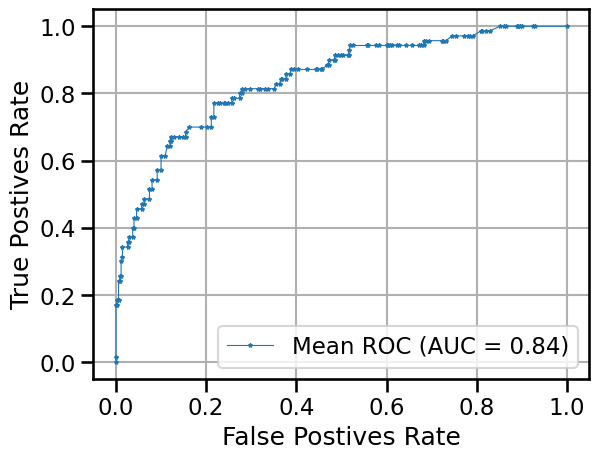

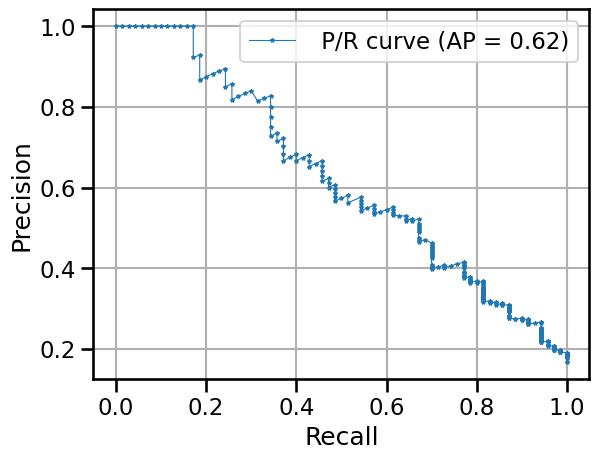

In [619]:
# A "micro-average": quantifying score on all classes jointly
precision = dict()
recall = dict()
average_precision = dict()

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_score, average="micro")

plt.plot(fpr["micro"], tpr["micro"], label='Mean ROC (AUC = %0.2f)' % (roc_auc["micro"]), 
         linestyle='-', linewidth=0.8, marker='*', markersize=3)
plt.xlabel('False Postives Rate')
plt.ylabel('True Postives Rate')
plt.grid(True, which='major', axis='both')
plt.legend()
plt.show()

plt.plot(recall["micro"], precision["micro"], label=' P/R curve (AP = %0.2f)' % (average_precision["micro"]), 
         linestyle='-', linewidth=0.8, marker='*', markersize=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True, which='major', axis='both')
plt.show()

In [620]:
average_precision_micro = np.mean(precision["micro"])
average_recall_micro = np.mean(recall["micro"])

def calculate_micro_average_f1(precision, recall):
    if precision + recall == 0:
        return 0  # Avoid division by zero
    return 2 * (precision * recall) / (precision + recall)

# Calculate the F1 Score
f1_score_micro = calculate_micro_average_f1(average_precision_micro, average_recall_micro)
print(f"Micro-Averaged F1 Score from averages: {f1_score_micro:.3f}")

Micro-Averaged F1 Score from averages: 0.543


## Feature Importance_

In [621]:
# Collect in an ordered array the features and their importance in the prediction
feature_importance = []
# features = df_train.drop(['resolution', 'session_id', 'File'], axis=1).columns.tolist()
features = x_train.columns.tolist()

# Here is an example of how to get the feature importance for 
for i, feature in enumerate(features):
  feature_importance.append({'name': feature, 'GINI_index': gen_clf.estimators_[1].feature_importances_[i]})

feature_importance = sorted(feature_importance, key=lambda k: k['GINI_index'], reverse=True)

In [622]:
!pip install seaborn

In [629]:
feature_importance

[{'name': '90PercChunkSizeforlast100', 'GINI_index': 0.11027485742448778},
 {'name': '75PercChunkSizeforlast10', 'GINI_index': 0.05606278114947043},
 {'name': 'MaxChunksizeforlast10', 'GINI_index': 0.048281123066917966},
 {'name': 'MinChunksizeforfirst10', 'GINI_index': 0.03994688596069699},
 {'name': '85PercChunkSizeforlast100', 'GINI_index': 0.03819764140418819},
 {'name': 'Bitrate', 'GINI_index': 0.03764242293873275},
 {'name': '90PercChunkSizeforAll', 'GINI_index': 0.034273531212387943},
 {'name': 'AvgChunksizeforlast10', 'GINI_index': 0.032505738905032354},
 {'name': '50PercChunkSizeforlast10', 'GINI_index': 0.03244413220882358},
 {'name': 'StdChunksizeforlast100', 'GINI_index': 0.031236357626815783},
 {'name': 'RetransmittedChunks', 'GINI_index': 0.030751457754186293},
 {'name': '90PercChunkSizeforlast10', 'GINI_index': 0.03033962625653925},
 {'name': 'AvgTransferTime', 'GINI_index': 0.02688330968190693},
 {'name': 'AvgChunksizeforlast100', 'GINI_index': 0.026063749921347787},
 {

                        name  GINI_index
0  90PercChunkSizeforlast100    0.110275
1   75PercChunkSizeforlast10    0.056063
2      MaxChunksizeforlast10    0.048281
3     MinChunksizeforfirst10    0.039947
4  85PercChunkSizeforlast100    0.038198


/tmp/ipykernel_28/1813954981.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GINI_index', y='name', data=df_feature_importance, palette="viridis")


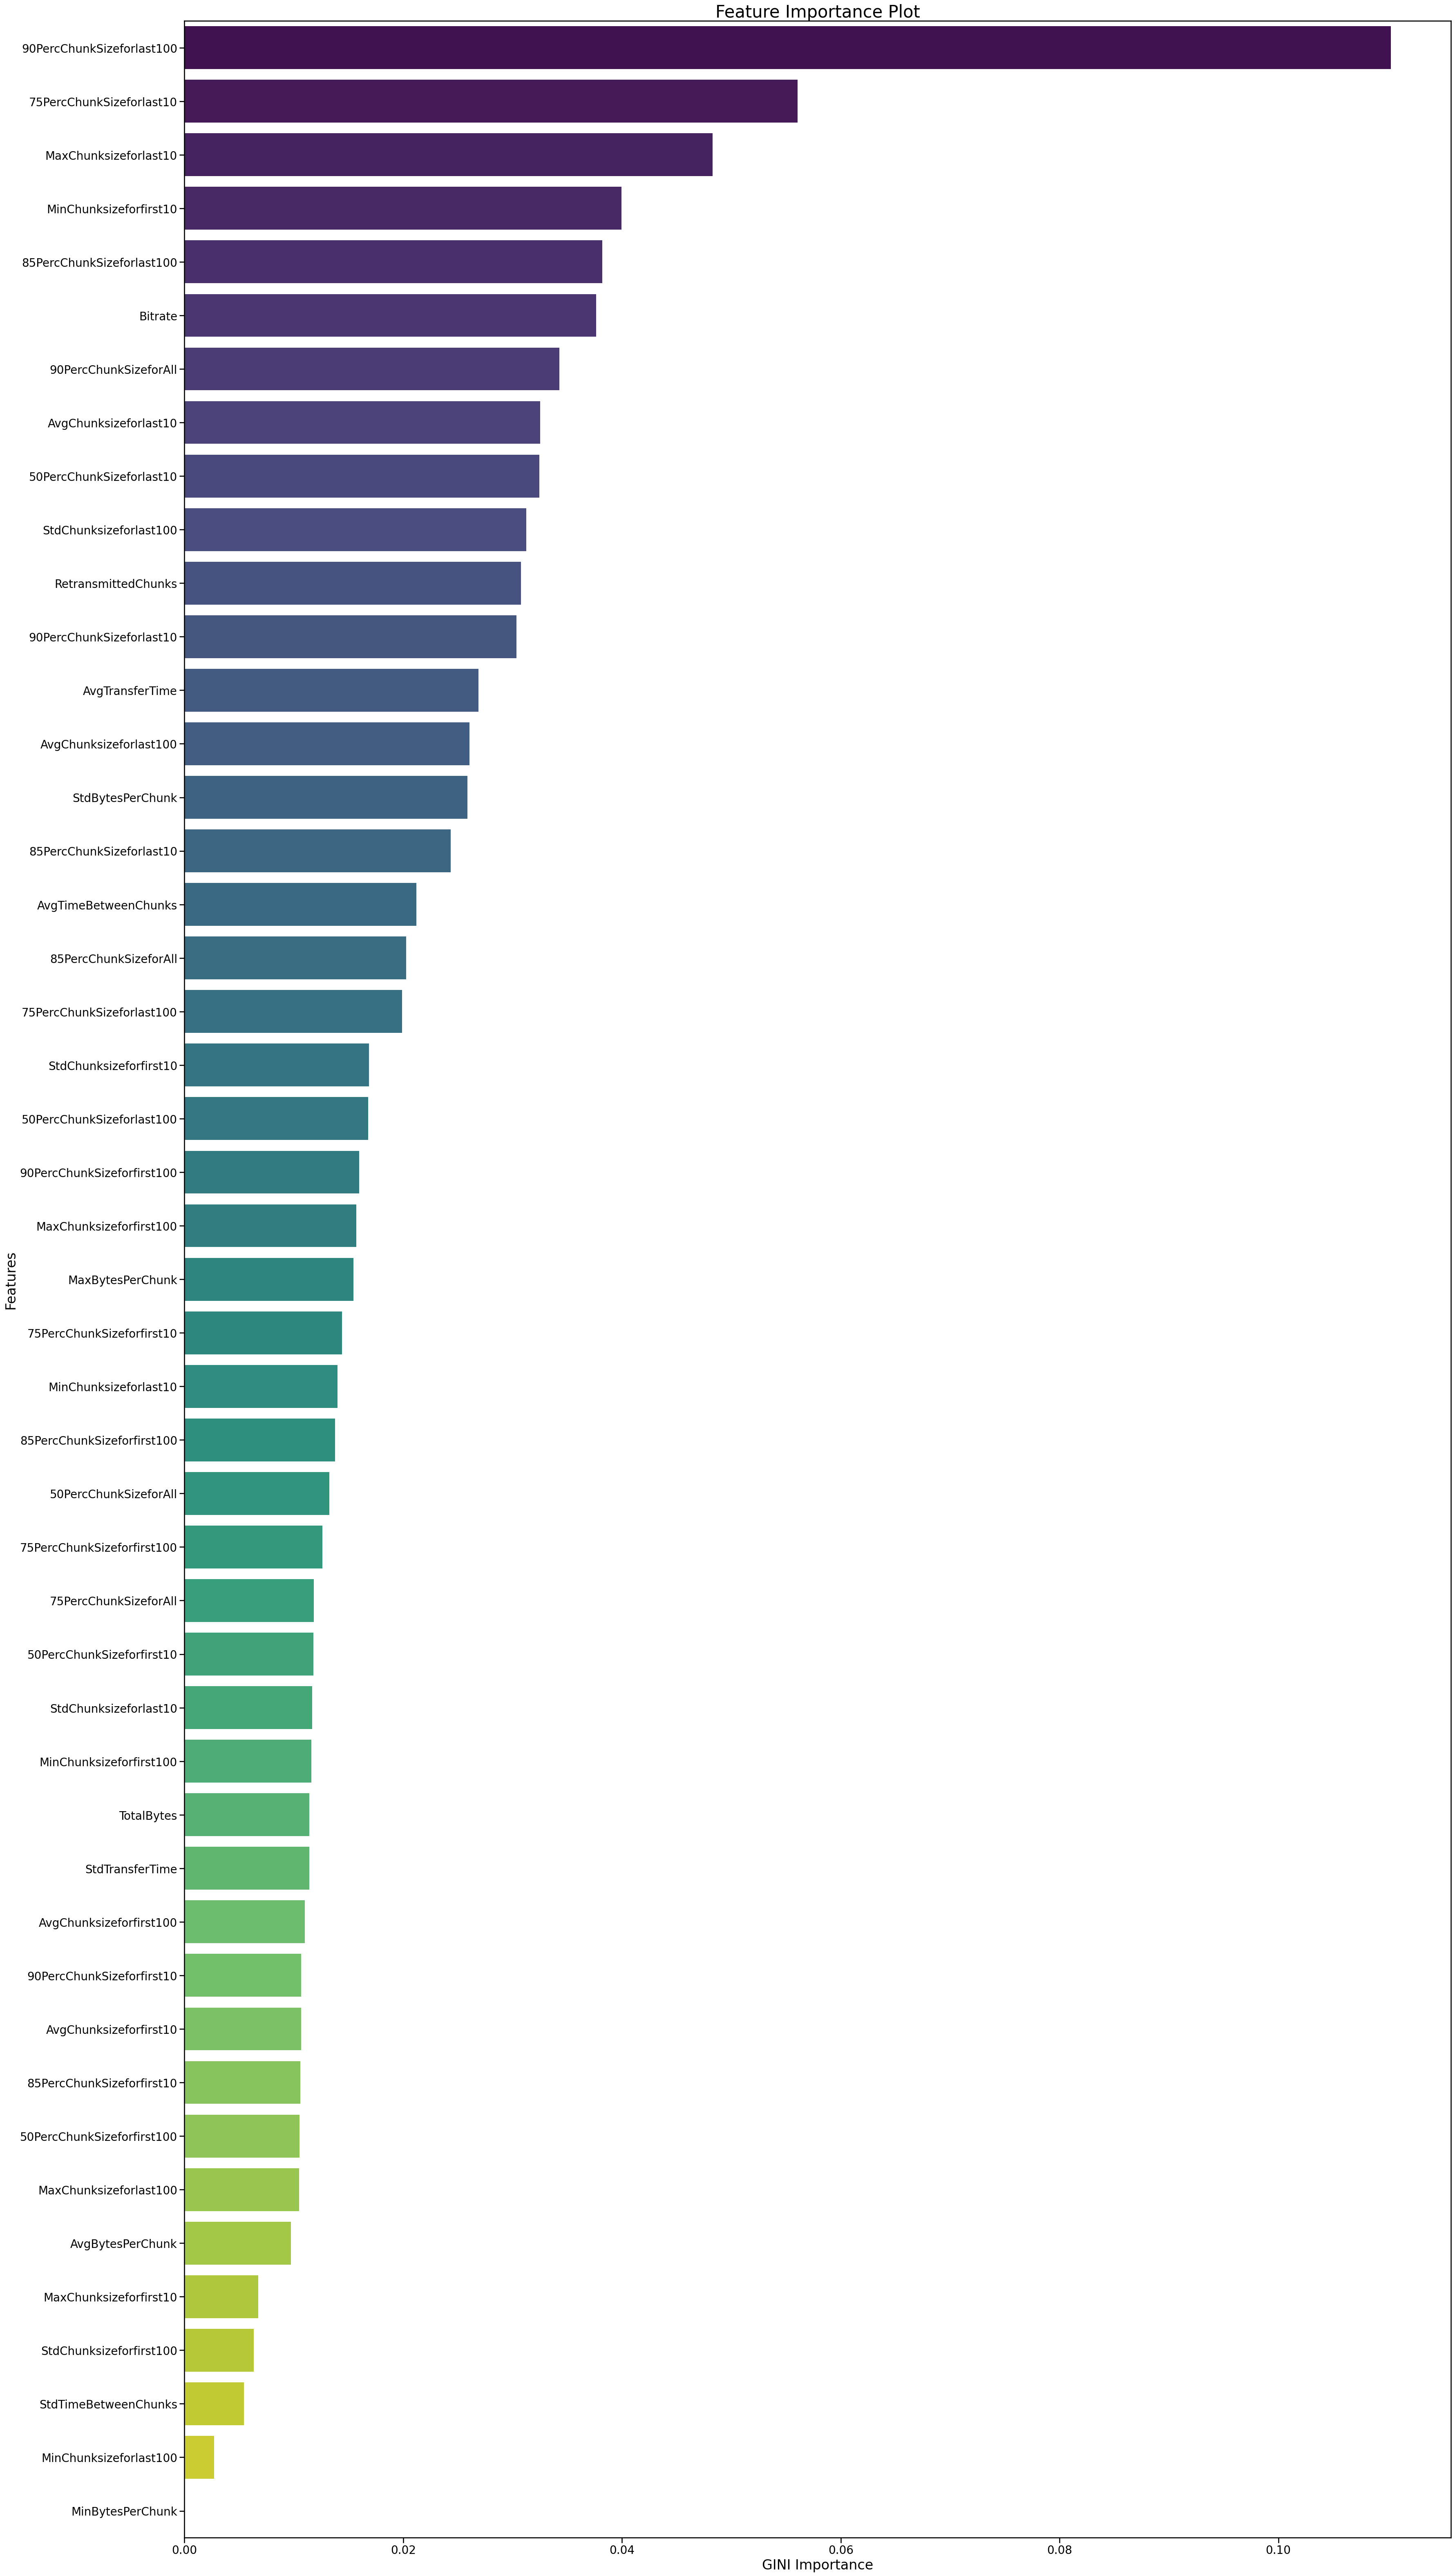

In [630]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sorted feature importance data to a DataFrame
df_feature_importance = pd.DataFrame(feature_importance)
print(df_feature_importance.head())

# Set the plot size
plt.figure(figsize=(40, 80))  # Increase the figure size (width, height) as needed

# Set larger font sizes
sns.set_context("talk")  # 'talk' is larger than the default. Other options include 'paper', 'notebook', 'talk', 'poster'

# Creating a bar plot
sns.barplot(x='GINI_index', y='name', data=df_feature_importance, palette="viridis")

# Adding plot labels and title with increased font sizes
plt.xlabel('GINI Importance', fontsize=24)  # Increase font size for x-label
plt.ylabel('Features', fontsize=24)  # Increase font size for y-label
plt.title('Feature Importance Plot', fontsize=30)  # Increase font size for title

# Optionally, you can adjust tick parameters for both axes
plt.xticks(fontsize=20)  # Increase font size for x-ticks
plt.yticks(fontsize=20)  # Increase font size for y-ticks

# Display the plot
plt.show()
